Lab - EDA Bivariate Analysis: Diving into Amazon UK Product Insights Part II
Objective: Delve into the dynamics of product pricing on Amazon UK to uncover insights that can inform business strategies and decision-making.

Dataset: This lab utilizes the Amazon UK product dataset which provides information on product categories, brands, prices, ratings, and more from from Amazon UK. You'll need to download it to start working with it.

In [39]:
import csv
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import chi2_contingency, pearsonr
from statsmodels.graphics.gofplots import qqplot



In [40]:
df = pd.read_csv('amz_uk_price_prediction_dataset.csv')
df.head()


,uid,asin,title,stars,reviews,price,isBestSeller,boughtInLastMonth,category
0,1,B09B96TG33,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
1,2,B01HTH3C8S,"Anker Soundcore mini, Super-Portable Bluetooth...",4.7,98099,23.99,True,0,Hi-Fi Speakers
2,3,B09B8YWXDF,"Echo Dot (5th generation, 2022 release) | Big ...",4.7,15308,21.99,False,0,Hi-Fi Speakers
3,4,B09B8T5VGV,"Echo Dot with clock (5th generation, 2022 rele...",4.7,7205,31.99,False,0,Hi-Fi Speakers
4,5,B09WX6QD65,Introducing Echo Pop | Full sound compact Wi-F...,4.6,1881,17.99,False,0,Hi-Fi Speakers


Part 1: Analyzing Best-Seller Trends Across Product Categories
Objective: Understand the relationship between product categories and their best-seller status.

Crosstab Analysis:

Create a crosstab between the product category and the isBestSeller status.

Are there categories where being a best-seller is more prevalent?

Hint: one option is to calculate the proportion of best-sellers for each category and then sort the categories based on this proportion in descending order.

In [41]:
crosstab = pd.crosstab(df['category'], df['isBestSeller'])
crosstab['bs_proportion'] = crosstab[True] / crosstab.sum(axis=1)
crosstab.head(10)

isBestSeller,False,True,bs_proportion
category,,,
3D Printers,247,1,0.004032
3D Printing & Scanning,4065,2,0.000492
Abrasive & Finishing Products,245,5,0.020000
Action Cameras,1696,1,0.000589
Adapters,251,3,0.011811
Agricultural Equipment & Supplies,8421,109,0.012778
Alexa Built-In Devices,106,1,0.009346
Art & Craft Supplies,253,5,0.019380
Arts & Crafts,9319,230,0.024086


In [42]:
sorted_categories = crosstab['bs_proportion'].sort_values(ascending=False)
sorted_categories.head()

category
Grocery                           0.058135
Smart Home Security & Lighting    0.057692
Health & Personal Care            0.057686
Mobile Phone Accessories          0.042471
Power & Hand Tools                0.035339
Name: bs_proportion, dtype: float64

Part 2: Exploring Product Prices and Ratings Across Categories and Brands
Objective: Investigate how different product categories influence product prices.

Preliminary Step: Remove outliers in product prices.
For this purpose, we can use the IQR (Interquartile Range) method. Products priced below the first quartile minus 1.5 times the IQR or above the third quartile plus 1.5 times the IQR will be considered outliers and removed from the dataset. The next steps will be done with the dataframe without outliers.

Hint: you can check the last Check For Understanding at the end of the lesson EDA Bivariate Analysis for a hint on how to do this.


In [43]:
df = df[df['price'].between(df['price'].quantile(0.25) - 1.5 * (df['price'].quantile(0.75) - df['price'].quantile(0.25)), df['price'].quantile(0.75) + 1.5 * (df['price'].quantile(0.75) - df['price'].quantile(0.25)))]


Use a violin plot to visualize the distribution of price across different product categories. Filter out the top 20 categories based on count for better visualization.
Which product category tends to have the highest median price? Don't filter here by top categories.


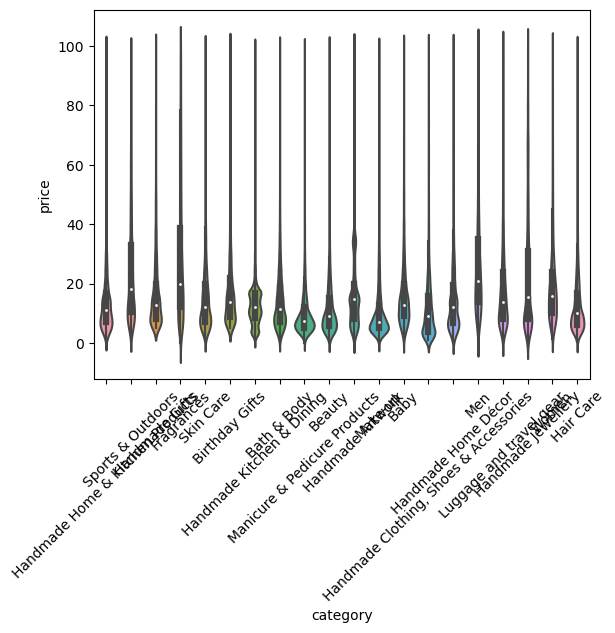

In [44]:
top_categories = df['category'].value_counts().nlargest(20).index
sns.violinplot(x='category', y='price', data=df[df['category'].isin(top_categories)])
plt.xticks(rotation=45)
plt.show()

In [45]:
median_prices = df.groupby('category')['price'].median()
highest_median_price = median_prices.idxmax()
highest_median_price

'Desktop PCs'

Create a bar chart comparing the average price of products for the top 10 product categories (based on count).
Which product category commands the highest average price? Don't filter here by top categories.
Box Plots:

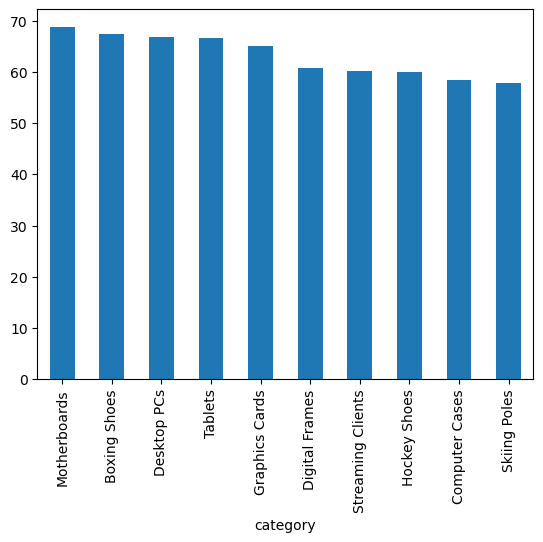

In [46]:
average_prices = df.groupby('category')['price'].mean().nlargest(10)
average_prices.plot(kind='bar')
plt.show()

In [47]:
highest_average_price = average_prices.idxmax()
highest_average_price

'Motherboards'


Visualize the distribution of product ratings based on their category using side-by-side box plots. Filter out the top 10 categories based on count for better visualization.
Which category tends to receive the highest median rating from customers? Don't filter here by top categories.

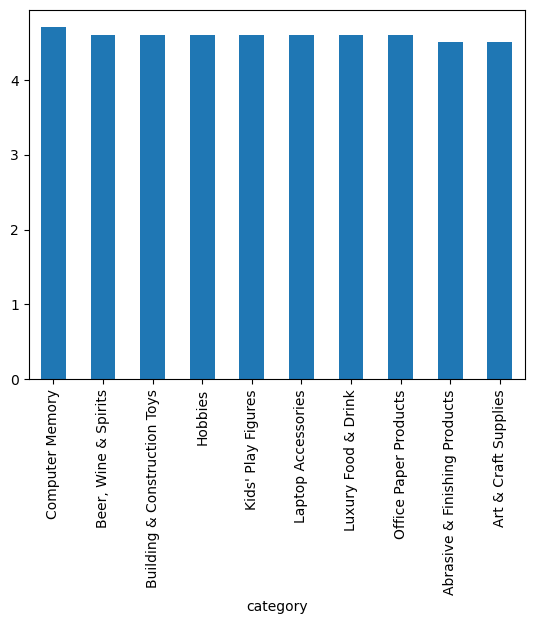

In [48]:
df.groupby('category')['stars'].median().nlargest(10).plot(kind='bar')
plt.show()


In [49]:
median_ratings = df.groupby('category')['stars'].median()
highest_median_rating = median_ratings.idxmax()
highest_median_rating

'Computer Memory'

Part 3: Investigating the Interplay Between Product Prices and Ratings
Objective: Analyze how product ratings (stars) correlate with product prices.

Correlation Coefficients:

Calculate the correlation coefficient between price and stars.
Is there a significant correlation between product price and its rating?

In [50]:
correlation_coefficient, _ = pearsonr(df['price'], df['stars'])
print("Correlation Coefficient:", round(correlation_coefficient, 2))


Correlation Coefficient: -0.08


Visualizations:

Use a scatter plot to visualize the relationship between product rating and price. What patterns can you observe?
Use a correlation heatmap to visualize correlations between all numerical variables.
Examine if product prices typically follow a normal distribution using a QQ plot.

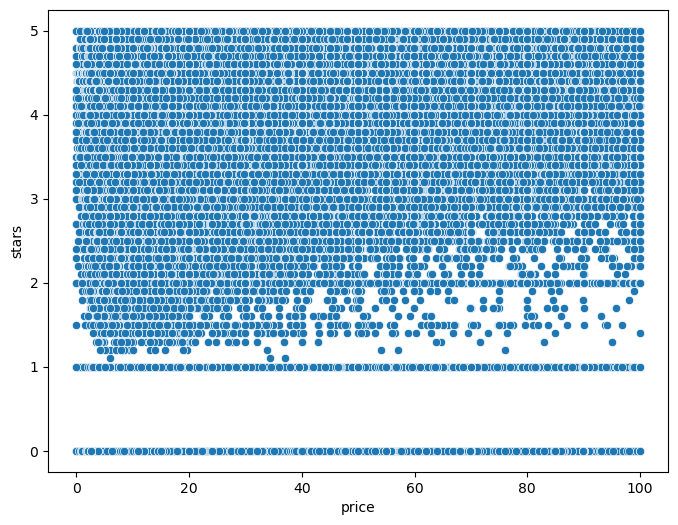

In [51]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='price', y='stars', data=df)
plt.show()



In [52]:
df['price'] = pd.to_numeric(df['price'], errors='coerce')

df.dropna(subset=['price'], inplace=True)

numeric_df = df.select_dtypes(include=['float64', 'int64'])

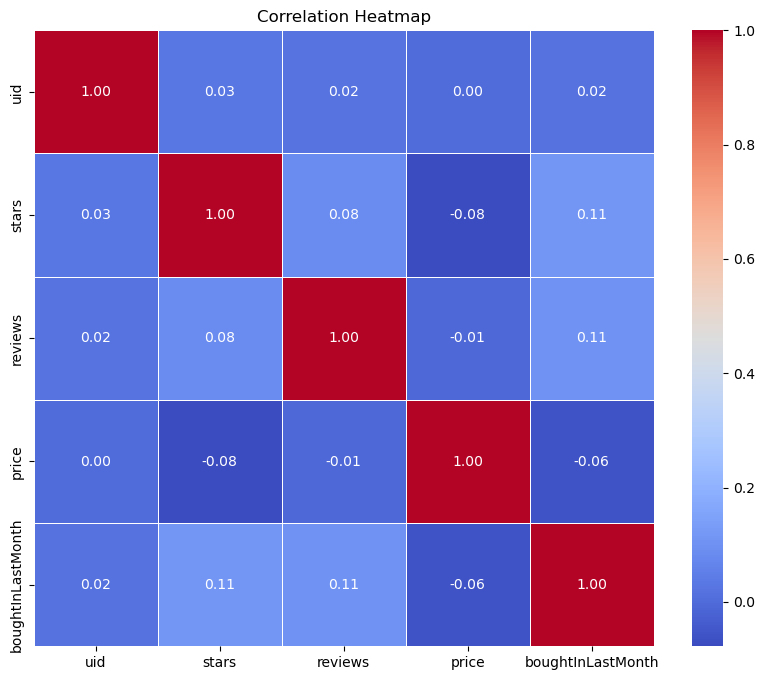

In [53]:
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

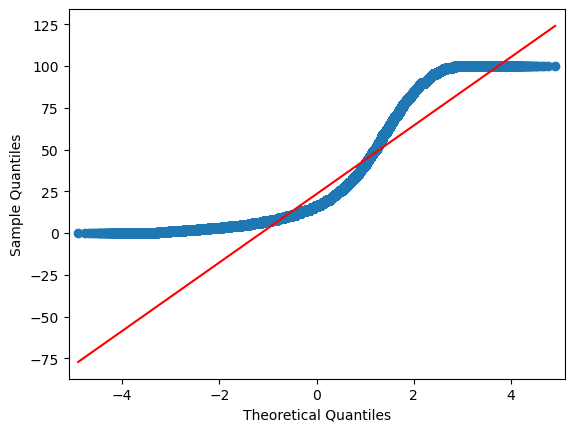

In [54]:
sm.qqplot(df['price'], line='s')
plt.show()